Misclassified samples: 4
Accuracy: 0.91


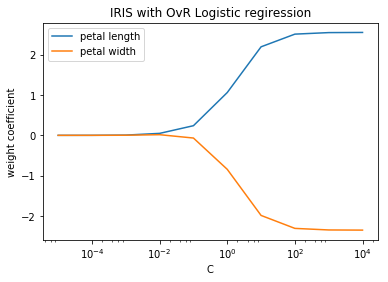

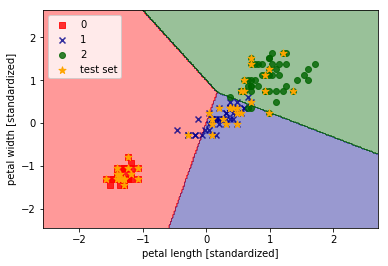

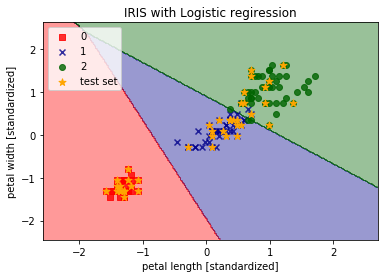

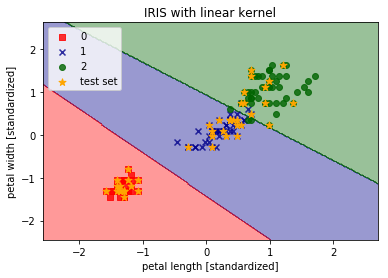

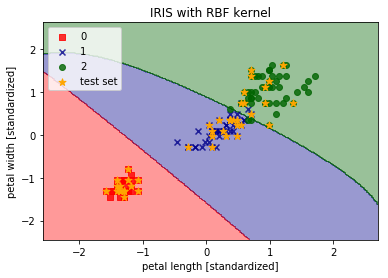

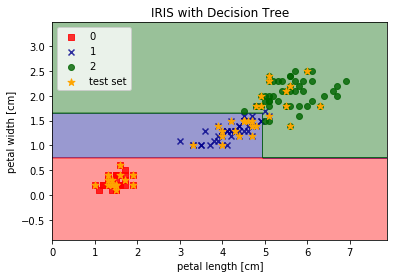

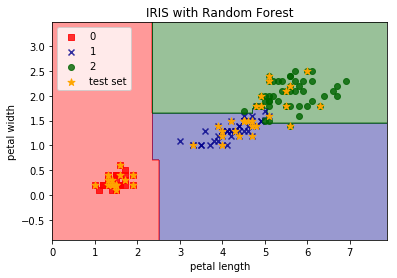

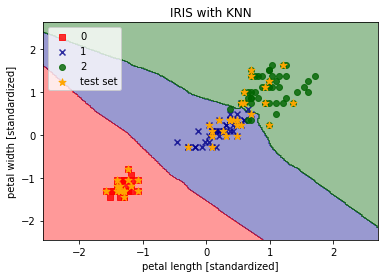

In [5]:
##
# PYTHONPATH=. python3 apps/train_test.py
#
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from apps.utils import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def logistic_regression(X_train_std, y_train, X_test_std, y_test):
    lr = LogisticRegression(C=1000.0, random_state=0)
    lr.fit(X_train_std, y_train)
    X_comb_std = np.vstack((X_train_std, X_test_std))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb_std, y_comb, classifier=lr, test_idx=range(105, 150))
    plt.title('IRIS with Logistic regiression')
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def decision_regions(X_train_std, y_train, X_test_std, y_test, classifier):
    X_comb_std = np.vstack((X_train_std, X_test_std))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb_std, y_comb, classifier=classifier, test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def logistic_regression_ovr(X_train_std, y_train, X_test_std, y_test):
    weights, params = [], []
    for c in np.arange(-5, 5):
        C = np.power(10, c) if c >= 0 else 1/np.power(10, -c)
        lr = LogisticRegression(C=C, random_state=0)
        lr.fit(X_train_std, y_train)
        weights.append(lr.coef_[1])
        params.append(C)
    weights = np.array(weights)
    plt.plot(params, weights[:, 0], label='petal length')
    plt.plot(params, weights[:, 1], linestyle='-', label='petal width')
    plt.title('IRIS with OvR Logistic regiression')
    plt.xlabel('C')
    plt.ylabel('weight coefficient')
    plt.legend(loc='upper left')
    plt.xscale('log')
    plt.show()
    plt.close()

def linear_kernel(X_train_std, y_train, X_test_std, y_test):
    svm = SVC(kernel='linear', C=1.0, random_state=0)
    svm.fit(X_train_std, y_train)
    X_comb_std = np.vstack((X_train_std, X_test_std))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb_std, y_comb,
            classifier=svm, test_idx=range(105, 150))
    plt.title('IRIS with linear kernel')
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def rbf_kernel(X_train_std, y_train, X_test_std, y_test):
    svm = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=0)
    svm.fit(X_train_std, y_train)
    X_comb_std = np.vstack((X_train_std, X_test_std))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb_std, y_comb,
            classifier=svm, test_idx=range(105, 150))
    plt.title('IRIS with RBF kernel')
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def sk_decision_tree(X_train, y_train, X_test, y_test):
    """
    dot -Tpng build/tree.dot -o build/tree.png
    """
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    tree.fit(X_train, y_train)
    export_graphviz(tree, out_file='build/tree.dot', feature_names=['petal length', 'petal width'])
    X_comb = np.vstack((X_train, X_test))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb, y_comb, classifier=tree, test_idx=range(105, 150))
    plt.title('IRIS with Decision Tree')
    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def random_forest(X_train, y_train, X_test, y_test):
    forest = RandomForestClassifier(criterion='entropy',
            n_estimators=10, random_state=1, n_jobs=2)
    forest.fit(X_train, y_train)
    X_comb = np.vstack((X_train, X_test))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb, y_comb,
            classifier=forest, test_idx=range(105, 150))
    plt.title('IRIS with Random Forest')
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def knn(X_train_std, y_train, X_test_std, y_test):
    knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
    knn.fit(X_train_std, y_train)
    X_comb_std = np.vstack((X_train_std, X_test_std))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb_std, y_comb, classifier=knn, test_idx=range(105, 150))
    plt.title('IRIS with KNN')
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def selftest():
    """
Using sklearn classifier
------------------------
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')
    """
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
    ppn.fit(X_train_std, y_train)
    y_pred = ppn.predict(X_test_std)
    print('Misclassified samples: %d' % (y_test!=y_pred).sum())
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    logistic_regression_ovr(X_train_std, y_train, X_test_std, y_test)
    
    decision_regions(X_train_std, y_train, X_test_std, y_test, ppn)
    logistic_regression(X_train_std, y_train, X_test_std, y_test)
    linear_kernel(X_train_std, y_train, X_test_std, y_test)
    rbf_kernel(X_train_std, y_train, X_test_std, y_test)
    sk_decision_tree(X_train, y_train, X_test, y_test)
    random_forest(X_train, y_train, X_test, y_test)
    knn(X_train_std, y_train, X_test_std, y_test)
    

if __name__ == '__main__':
    selftest()



In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
cnt = cnt_vec.fit_transform(['petal','panel','panel',
                             'panel begin'])
cnt.shape

(4, 3)

In [252]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

tf_vec = TfidfVectorizer(stop_words='english')
q1 = [
    'panel begin where something',
    'newzeland begin where something',
    'panel begin where of cause',
    'what is your favourite pet',
    'panel begin night here',
    'answer is negative',
]

q2 = [
    'panel begin where something',
    'newzeland begin where something',
    'panel begin where of cause',
    'noop',
    'panel only night noop',
    'answer is correct',
]

y = [
    1, 1, 1, 0, 0, 0
]


mlp = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

params = []
for x1, x2, yx in zip(q1, q2, y):
    print(x1, x2)
    x = tf_vec.fit_transform([x1, x2], y)
    #x2_form = tf_vec.fit_transform([x2])
    print(x.data)
    #print('='*80+'\nX[{}]:\n{}'.format(type(x), x))

"""
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=2, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1])
plt.show()
"""


#for p, yx in zip(params, y):
#    print('n_samples:{}, n_features:{}'.format(p[0], p[1]))


    

panel begin where something panel begin where something
[ 0.70710678  0.70710678  0.70710678  0.70710678]
newzeland begin where something newzeland begin where something
[ 0.70710678  0.70710678  0.70710678  0.70710678]
panel begin where of cause panel begin where of cause
[ 0.57735027  0.57735027  0.57735027  0.57735027  0.57735027  0.57735027]
what is your favourite pet noop
[ 0.70710678  0.70710678  1.        ]
panel begin night here panel only night noop
[ 0.50154891  0.70490949  0.50154891  0.50154891  0.50154891  0.70490949]
answer is negative answer is correct
[ 0.57973867  0.81480247  0.57973867  0.81480247]


'\nX, y = make_classification(n_features=2, n_redundant=0, n_informative=2,\n                           random_state=2, n_clusters_per_class=1)\nplt.scatter(X[:,0], X[:,1])\nplt.show()\n'

In [258]:
X1 = tf.placeholder(tf.float32, [2], name="train_data")
X2 = tf.placeholder(tf.float32, [2], name="train_data")
train_labels = tf.placeholder(tf.int32, [2], name="train_labels")





#tf.train.AdamOptimizer(learning_rate).minimize(loss)

(2,)
